In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importer data and verify the quality of data

In [2]:
Dataset = pd.read_csv('train.csv')

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
Dataset.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [5]:
Dataset.shape

(1017209, 9)

In [6]:
Data_Nan = Dataset.loc[Dataset.isnull().any(axis=1),:]
Data_Nan

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [8]:
Dataset.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


There is no Nan in the whole Dataset.

In [9]:
Data_sal = Dataset.loc[Dataset['Sales'] >= 1, :]
Data_anomalie = Data_sal.loc[Data_sal['Open'] == 0]
Data_anomalie

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [10]:
Stores = pd.read_csv('store.csv')
Stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
Stores.shape

(1115, 10)

In [12]:
Dataset = Dataset.merge(Stores, on = 'Store')

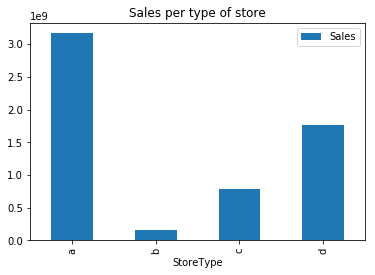

In [13]:
Stores_rep = Dataset[['StoreType','Sales']].groupby(by='StoreType').sum().plot(kind = "bar", title = "Sales per type of store")


### Correlation bewteen the inputs

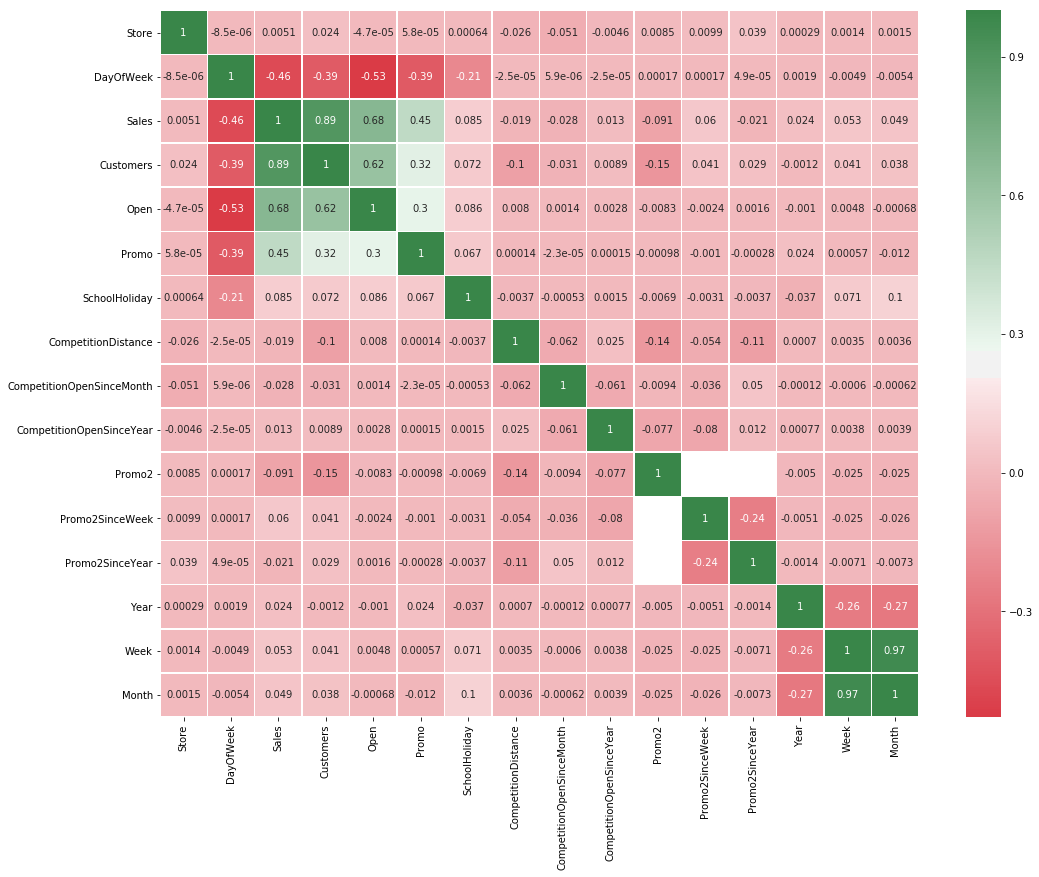

In [81]:

f, ax = plt.subplots(figsize = (17, 13))
sns.heatmap(Dataset.corr(), annot=True, cmap=sns.diverging_palette(10, 133, as_cmap=True), linewidths=0.5)

We can see that some variables are corrolated (Week and Month for example, which makes absolute sense since the week numbers correspond to a certain month). The number of Customers is also close to the number of Sales, as well as Open.

### Transforming the data


Transforming the timestamps to a more useful format

In [15]:
Dataset['Date'] = pd.to_datetime(Dataset['Date'], format='%Y-%m-%d')
Dataset['Year'] = pd.DatetimeIndex(Dataset['Date']).year
Dataset['Week'] = pd.DatetimeIndex(Dataset['Date']).weekofyear
Dataset['Month'] = pd.DatetimeIndex(Dataset['Date']).month

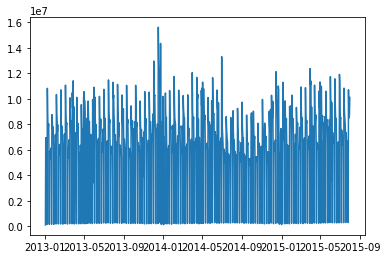

In [16]:
Repart_Weeks = Dataset[['Sales','Date']].groupby(by='Date').sum()
Repart_Weeks.reset_index(inplace=True) 
Repart_Weeks = Repart_Weeks.sort_values(by='Date')
plt.plot(Repart_Weeks['Date'], Repart_Weeks['Sales'])

In [17]:
Repart_Stores = Dataset[['Store', 'Sales']].groupby(by='Store').sum().sort_values(by='Store')
Repart_Stores.describe()

,Sales
count,1.115000e+03
mean,5.267427e+06
std,1.951304e+06
min,2.114322e+06
25%,3.949377e+06
50%,4.990259e+06
75%,6.084148e+06
max,1.951684e+07


In [18]:
Dataset[['StateHoliday','Store']].groupby(by ='StateHoliday').count()

,Store
StateHoliday,
0,131072
0,855087
a,20260
b,6690
c,4100


We can see that there is a format issue for this column (str and int). We're going to transform the format of the data then one-hot encode it

In [19]:
Dataset['StateHoliday'] = Dataset['StateHoliday'].astype('str')

In [20]:
Dataset[['StateHoliday','Store']].groupby(by ='StateHoliday').count()

,Store
StateHoliday,
0,986159
a,20260
b,6690
c,4100


### Encoding of the non numeric columns

In [21]:
Dataset.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Year                                  int64
Week                                  int64
Month                                 int64
dtype: object

We'll need to encode all the object columns 

In [37]:
dataset = Dataset.copy()
dataset['PromoInterval'] = dataset['PromoInterval'].fillna('0')
dataset['Promo2SinceWeek'] = dataset['Promo2SinceWeek'].fillna(0)
dataset['Promo2SinceYear'] = dataset['Promo2SinceWeek'].fillna(0)

We replace the NaN values by 0 in the Promo columns. It means that there was no Promo so 0 is a good replacement value

The following function One Hot encodes all the non numerical values while renaming them by adding the name of the category to the column name. It also removes the dummy variable.

In [38]:
from sklearn.preprocessing import OneHotEncoder
from joblib import dump, load
cat_cols = dataset.select_dtypes(include='object').columns
for col in cat_cols:
    print(col)
    col_vals = np.array(dataset[col])  # on récupère les valeurs
    val2enc = col_vals.reshape(len(col_vals), 1)  # on modifie la taille pour passer l'encodeur
    ohe = OneHotEncoder(sparse=False)
    newval = ohe.fit_transform(val2enc)
    dump(ohe, col+'_ohe.joblib')
    name_cols = list(map(lambda x: col + "_" + x, ohe.categories_[0]))  # noms des nouvelles colonnes
    newdf = pd.DataFrame(newval[:,:-1], columns=name_cols[:-1]) 
    dataset = pd.concat([dataset.drop([col], axis=1), newdf], axis=1)  # on supprimer l'ancienne feature


StateHoliday
StoreType
Assortment
PromoInterval


In [39]:
print ( dataset.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Week', 'Month', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'Assortment_a', 'Assortment_b', 'PromoInterval_0',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct'],
      dtype='object')


Now we must change the CompetionOpenSinceYear and CompetitionOpenSinceMonth to have the time since opening

In [40]:
new_col = dataset.apply( lambda row : row['Month'] - row['CompetitionOpenSinceMonth'] + (12 *(row['Year'] - row['CompetitionOpenSinceYear'])), axis=1)
dataset['Comp_opened'] = new_col
dataset['Comp_opened'] = dataset['Comp_opened'].fillna(0)
dataset['CompetitionDistance'] = dataset['CompetitionDistance'].fillna(3*dataset['CompetitionDistance'].max())

### Training and splitting

In [63]:
X = dataset.loc[:, ['DayOfWeek', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Week', 'Month', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'Assortment_a', 'Assortment_b', 'PromoInterval_0',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct']].values
y = dataset.loc[:, 'Sales'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor()
classifier.fit(X_train, y_train)

print('Score of the model : ',classifier.score(X_test, y_test) )
dump(classifier, 'randomforest.joblib')

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score of the model :  0.9828166430369856


['randomforest.joblib']

Le score de notre classifier est de 98%, ce qui indique qu'on peut avoir un bon intervalle de confiance concernant notre prédiction

In [67]:
from sklearn.metrics import explained_variance_score
var = explained_variance_score(classifier.predict(X_test), y_test)

In [78]:
def predict_anomaly(dataset, y):
    global var
    '''
    Dataset has the following columns :
    'DayOfWeek',
    'Customers',
    'Open',
    'Promo',
    'SchoolHoliday',
    'CompetitionDistance',
    'Promo2',
    'Promo2SinceWeek',
    'Promo2SinceYear',
    'Year',
    'Week',
    'Month',
    
    'StateHoliday',
    'StoreType'
    'Assortment'
    'PromoInterval'
    
    I assumed that the input data was at the right format, without NaN, ...
    
    y is the real value
    '''
    for col in ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'] :
        col_vals = np.array(dataset[col])
        val2enc = col_vals.reshape(len(col_vals), 1)
        ohe = load(col+'_ohe.joblib')
        newval = ohe.transform(val2enc)
        name_cols = list(map(lambda x: col + "_" + x, ohe.categories_[0]))
        newdf = pd.DataFrame(newval[:,:-1], columns=name_cols[:-1]) 
        dataset = pd.concat([dataset.drop([col], axis=1), newdf], axis=1)
    X = dataset.loc[:, ['DayOfWeek', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Week', 'Month', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'Assortment_a', 'Assortment_b', 'PromoInterval_0',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct']].values
    classifier = load('randomforest.joblib')
    y_pred = classifier.predict(dataset)
    y_res  = np.zeros(y_pred.shape)
    for i in range(y_pred.shape[0]):
        if y[i] < y_pred[i]*(var)**15 or y[i] > y_pred[i]*(1/var)**15 :
            y_res [i] = 1
    return y_res # if 1 : outlier, else, inlier